Grupo de trabajo: Alejandro Hernández A.-Nicolás Morales-Durán.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math

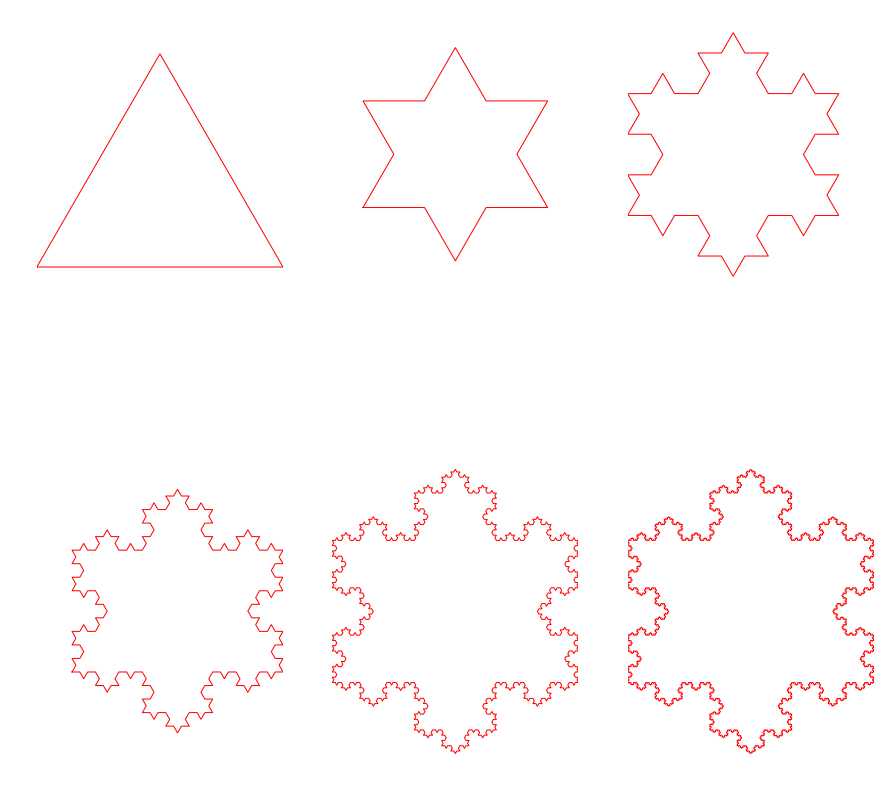

In [3]:
%matplotlib inline
angles = [math.radians(60*x) for x in range(6)] #Definimos un arreglo de seis ángulos equiespaciados entre 0 y 360 grados.
sines = [math.sin(x) for x in angles]
cosin = [math.cos(x) for x in angles]

def L(ang, co, jump): #Función que hace girar a la izquierda un determinado ángulo. 
    return (ang + 1) % 6
def R(ang, co, jump):  #Función que hace girar a la derecha un determinado ángulo. 
    return (ang + 4) % 6
def F(ang, co, jump): #Función que genera puntos en determinada dirección.
    co.append(
        (co[-1][0] + jump * cosin[ang],
         co[-1][1] + jump * sines[ang]))
    return ang

decode = dict(L=L, R=R, F=F) #Diccionario para definir nuestras funciones.

def koch(order, length, origin): #Definimos una función que dibuja el fractal, le entra el número de iteraciones, la longitud del perímetro de la figura y el origen de la figura.
    path="LFRFRF" #Hacemos que la figura se cierre.
    for i in xrange(order):
        path = path.replace("F", "FLFRFLF") #Iteraciones que generan el fractal.

    jump = float(length) / (3 ** order)
    co = [origin]
    ang = 0

    for move in path:
        ang = decode[move](ang, co, jump)
        

    return co


TOTALWIDTH = 300.0 #Longitud fija de la figura.

#Las primeras seis iteraciones corresponden a hacer: koch(1,TOTALWIDTH,(0,10)), koch(2,TOTALWIDTH,(0,10)), koch(3,TOTALWIDTH,(0,10)), koch(4,TOTALWIDTH,(0,10)), koch(5,TOTALWIDTH,(0,10)), koch(6,TOTALWIDTH,(0,10)),

plt.figure(figsize=(15,15)) #Ploteamos el panel deseado con las primeras seis iteraciones.
for i in range(0,6):
    points = koch(i,TOTALWIDTH,(0,10))
    plt.subplot(2,3,i+1,aspect='equal')
    plt.plot(np.asarray(points)[:,0],np.asarray(points)[:,1],color='red')
    plt.axis('off')
plt.show()

In [12]:
%matplotlib

fig = plt.figure()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(6):
    points1 = koch(i,TOTALWIDTH,(0,10))
    im = plt.plot(np.asarray(points1)[:,0],np.asarray(points1)[:,1],color='black')
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,repeat_delay=500)

ani.save('snowflake.gif',writer='imagemagick',fps=2,dpi=300) #Guardamos la animación.

plt.show()

Using matplotlib backend: MacOSX
